# Classification : LogisticRegression


## 1.환경준비

### (1) import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

### (2) 데이터 준비

In [ ]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Graduate_apply.csv"
data = pd.read_csv(path)
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


### admit: 합불(Y), gre: 대학원 진학 시험 점수, gpa: 학부 학점, rank: 대학교 분류

## 2.데이터 전처리

### (1) x, y 분할

In [ ]:
target = 'admit'
x = data.drop(target, axis=1)
y = data.loc[:, target]

### (2) 가변수화

In [ ]:
cat_cols = ['rank']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True) # drop_first: 젤 앞 칼럼 제외(나머지로 생성 가능, 다중공선성)

In [ ]:
x.head()

,gre,gpa,rank_2,rank_3,rank_4
0,380,3.61,False,True,False
1,660,3.67,False,True,False
2,800,4.00,False,False,False
3,640,3.19,False,False,True
4,520,2.93,False,False,True


### (3) 데이터분할 : train, val

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 20)

## 3.모델링
* 모델 선언
* 학습
* 예측
* 성능 검증

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import *

### (1) 선언
모델링을 어떻게 할 것인지 설정, 선언

In [ ]:
model = LogisticRegression()

### (2) 모델링(학습)

In [ ]:
model.fit(x_train, y_train)

LogisticRegression()

* 모델의 coeficient, intercept 확인

In [ ]:
model.coef_

array([[ 0.00358039,  0.64445615, -0.0287298 , -1.05014577, -0.91151163]])

In [ ]:
list(x_train)           # x 값들

['gre', 'gpa', 'rank_2', 'rank_3', 'rank_4']

In [ ]:
model.intercept_        # y절편

array([-4.60598403])

### (3) 검증 : 예측

In [ ]:
pred = model.predict(x_val)
pred   # y예측값(0,1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
# 예측 결과를 확률로 뽑고 싶다면
pred_p = model.predict_proba(x_val)   # 0아니면 1일 확률값
pred_p[:10]   # [0일 확률,1일 확률]

# 0.5 기준으로 0 / 1 분류 -> 0.5 (cut-off value)

array([[0.51883085, 0.48116915],
       [0.6080832 , 0.3919168 ],
       [0.54826207, 0.45173793],
       [0.78828055, 0.21171945],
       [0.85975612, 0.14024388],
       [0.583778  , 0.416222  ],
       [0.56046632, 0.43953368],
       [0.5272615 , 0.4727385 ],
       [0.70368505, 0.29631495],
       [0.66466552, 0.33533448]])

### (4) 검증 : 평가

In [ ]:
accuracy_score( y_val, pred )

0.6916666666666667

## 4.분류 모델 평가

### (1) Confusion Matrix
https://en.wikipedia.org/wiki/Confusion_matrix

In [ ]:
confusion_matrix( y_val , pred  )

array([[73, 11],
       [26, 10]])

### (2) classification_report
* 분류문제 평가지표 종합판
* **print 문**으로 결과를 출력해야 제대로 보임.

In [ ]:
print(classification_report(y_val , pred  ))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80        84
           1       0.48      0.28      0.35        36

    accuracy                           0.69       120
   macro avg       0.61      0.57      0.57       120
weighted avg       0.66      0.69      0.66       120



* 참조 : confusion matrix 시각화

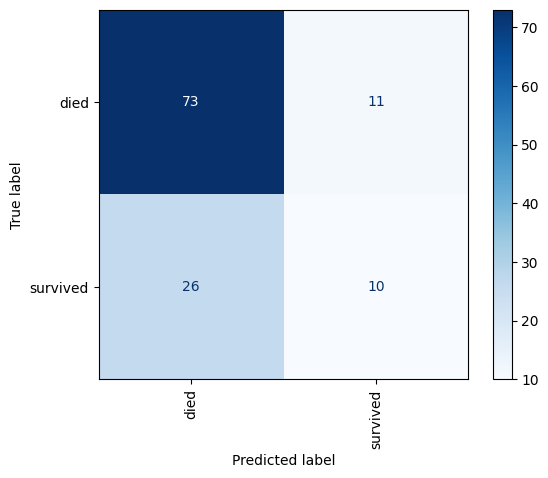

In [ ]:
cm = confusion_matrix( y_val , pred  )

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['died', 'survived'])
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()